In [26]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit


print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [27]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [28]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [30]:
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


**PLOT**

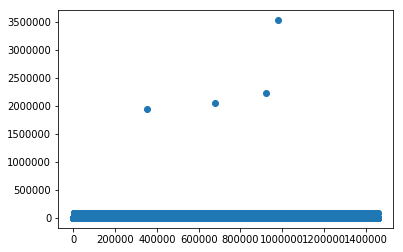

In [31]:

plt.plot( df_train['trip_duration'], data=df_train, linestyle='none', marker='o')
plt.show()

**FILTRE**

In [38]:
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])
df_train['year'] = df_train['pickup_datetime'].dt.year
df_train['month'] = df_train['pickup_datetime'].dt.month
df_train['day'] = df_train['pickup_datetime'].dt.day
df_train['hour'] = df_train['pickup_datetime'].dt.hour
df_train['weekday'] = df_train['pickup_datetime'].dt.weekday
df_train['dayofyear'] = df_train['pickup_datetime'].dt.dayofyear

df_train = df_train[df_train['trip_duration']<= 50000]
df_train = df_train[df_train['passenger_count']>= 1]  
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,year,month,day,hour,weekday,dayofyear
count,1.456605e+06,1.456605e+06,1.456605e+06,1.456605e+06,1.456605e+06,1.456605e+06,1.456605e+06,1456605.0,1.456605e+06,1.456605e+06,1.456605e+06,1.456605e+06,1.456605e+06
mean,1.534324e+00,1.664026e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,8.391263e+02,2016.0,3.516784e+00,1.550420e+01,1.360670e+01,3.049939e+00,9.183524e+01
std,4.988206e-01,1.313612e+00,7.093455e-02,3.288441e-02,7.067552e-02,3.588789e-02,7.097390e+02,0.0,1.681027e+00,8.703001e+00,6.399092e+00,1.954028e+00,5.156569e+01
min,1.000000e+00,1.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,2016.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073589e+01,3.970000e+02,2016.0,2.000000e+00,8.000000e+00,9.000000e+00,1.000000e+00,4.800000e+01
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075453e+01,6.620000e+02,2016.0,4.000000e+00,1.500000e+01,1.400000e+01,3.000000e+00,9.200000e+01
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396302e+01,4.076981e+01,1.073000e+03,2016.0,5.000000e+00,2.300000e+01,1.900000e+01,5.000000e+00,1.360000e+02
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,4.969100e+04,2016.0,6.000000e+00,3.100000e+01,2.300000e+01,6.000000e+00,1.820000e+02


In [39]:
columns= ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'year', 'month', 'day', 'hour', 'weekday', 
          'dayofyear']  


In [40]:
df_test['pickup_datetime'] = pd.to_datetime(df_test['pickup_datetime'])
df_test['year'] = df_test['pickup_datetime'].dt.year
df_test['month'] = df_test['pickup_datetime'].dt.month
df_test['day'] = df_test['pickup_datetime'].dt.day
df_test['hour'] = df_test['pickup_datetime'].dt.hour
df_test['weekday'] = df_test['pickup_datetime'].dt.weekday
df_test['dayofyear'] = df_test['pickup_datetime'].dt.dayofyear
    
df_test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,month,day,hour,weekday,dayofyear
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.0,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816,2016.0,3.521874,15.487283,13.610228,3.047670,91.972446
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824,0.0,1.680049,8.703919,6.394761,1.953951,51.555631
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322,2016.0,1.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000,2016.0,2.000000,8.000000,9.000000,1.000000,48.000000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543,2016.0,4.000000,15.000000,14.000000,3.000000,92.000000
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852,2016.0,5.000000,23.000000,19.000000,5.000000,136.000000
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597,2016.0,6.000000,31.000000,23.000000,6.000000,182.000000


In [41]:
X_train = df_train[columns]
y_train = df_train['trip_duration']

In [42]:
rf = RandomForestRegressor()
cv = ShuffleSplit(n_splits=5, test_size=0.2, train_size=0.1, random_state=200)
losses = -cross_val_score(rf, X_train, y_train, cv=cv, scoring='neg_mean_squared_log_error')
losses = [np.sqrt(l) for l in losses]
losses

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

[0.44491017603723426,
 0.4501827443001416,
 0.45029879063259687,
 0.4461786510224625,
 0.445971119305256]

In [43]:
rf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
X_test = df_test[columns]
y_pred = rf.predict(X_test)
y_pred.mean()

849.8648915634394

In [45]:
submission = pd.read_csv('../input/sample_submission.csv') 
submission.head()

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959


In [46]:
len(y_pred)

625134

In [47]:
submission['trip_duration'] = y_pred

In [48]:
submission.to_csv('submission.csv', index=False)

In [49]:
!ls

__notebook_source__.ipynb  submission.csv
